In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [199]:
wine_df = pd.read_csv('winequality-red.csv')

In [200]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [201]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [202]:
wine_df.shape


(1599, 12)

In [203]:
wine_df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [204]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [205]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [206]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

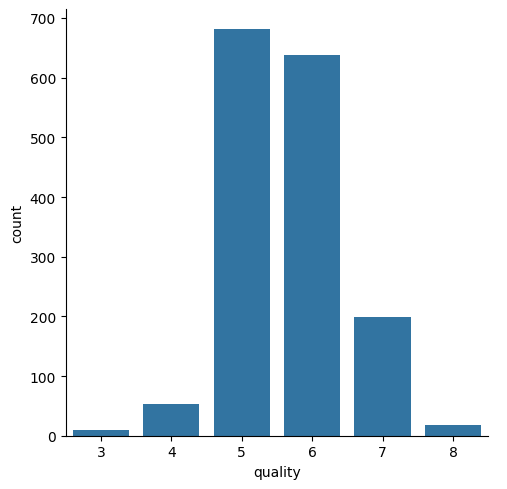

In [207]:
sns.catplot(x='quality',data = wine_df,kind = 'count')

<Axes: xlabel='quality', ylabel='fixed acidity'>

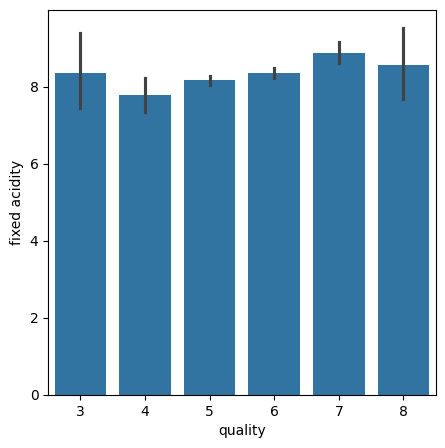

In [208]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y= 'fixed acidity' , data = wine_df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

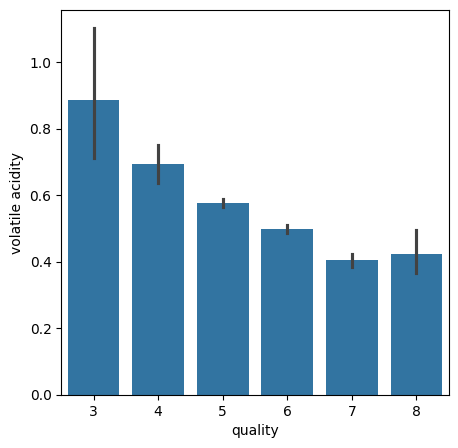

In [209]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

<Axes: xlabel='quality', ylabel='citric acid'>

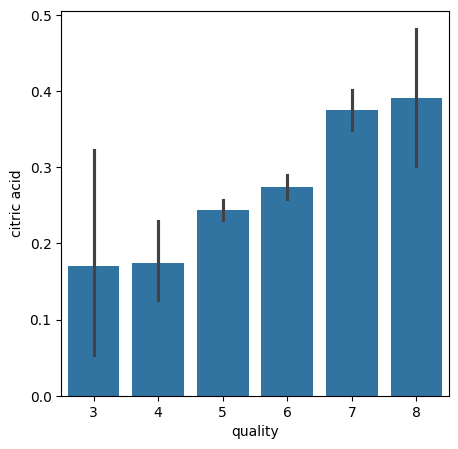

In [210]:


plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_df)

<Axes: xlabel='quality', ylabel='residual sugar'>

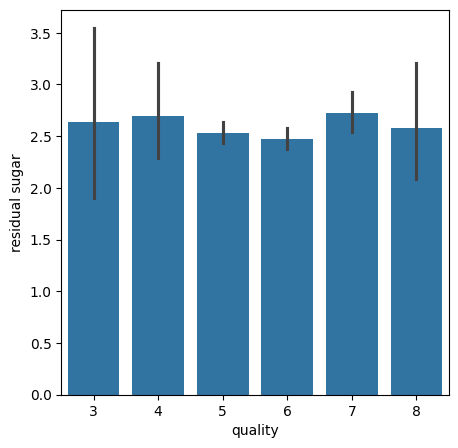

In [211]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

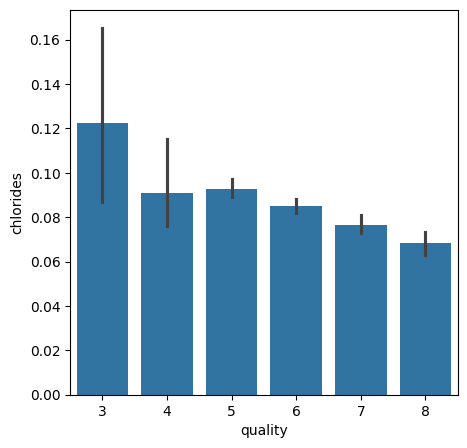

In [212]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

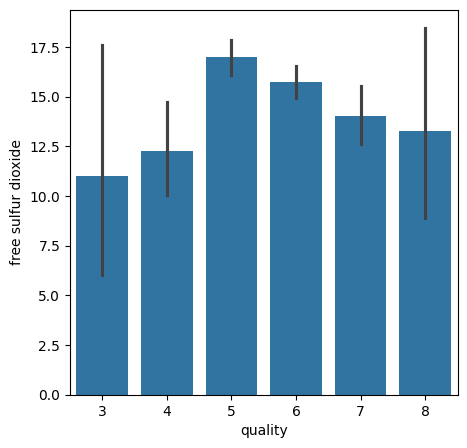

In [213]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

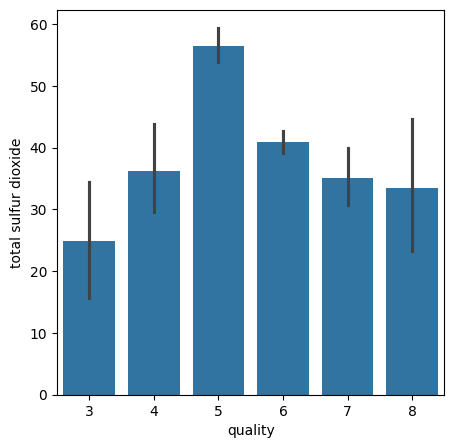

In [214]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

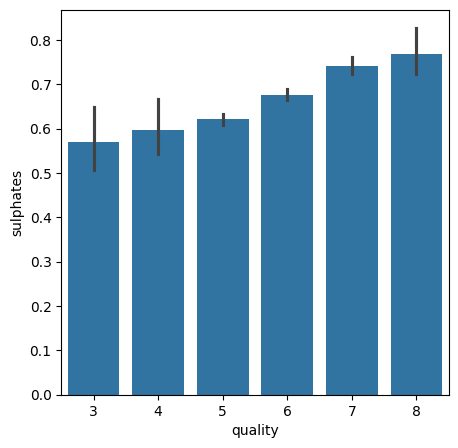

In [215]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=wine_df)

<Axes: xlabel='quality', ylabel='pH'>

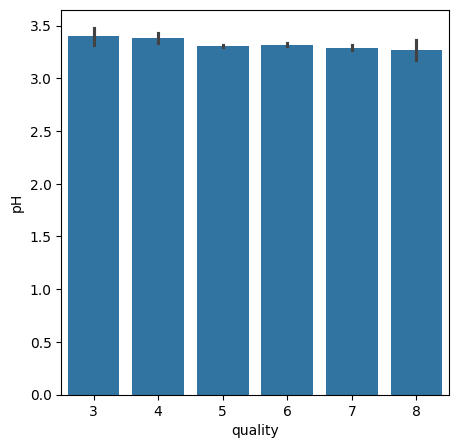

In [216]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=wine_df)

<Axes: xlabel='quality', ylabel='alcohol'>

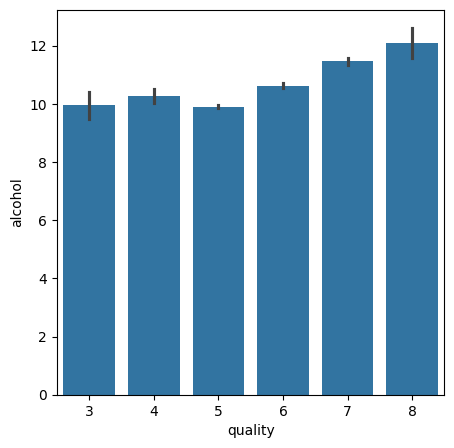

In [217]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_df)

<Axes: xlabel='quality', ylabel='density'>

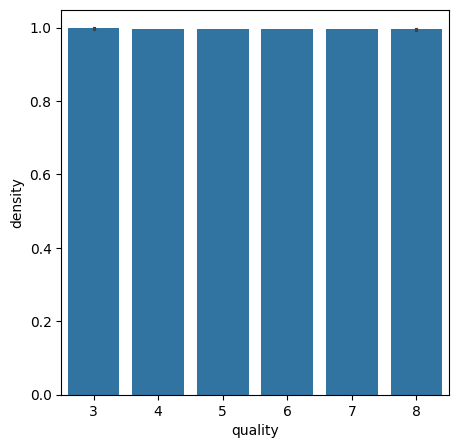

In [218]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wine_df)


# **Correlation**

<Axes: >

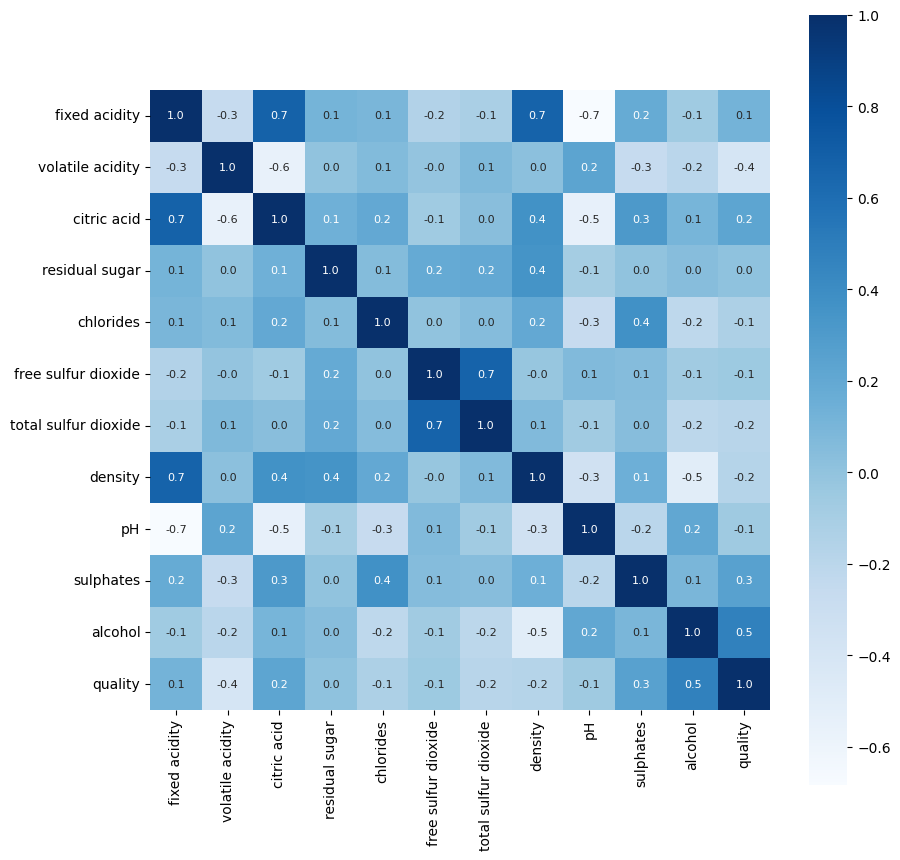

In [219]:
corr=wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1f',square=True,cmap='Blues',annot_kws={'size':8})

# **Separate the Data and Label Binarization**

In [220]:
X=wine_df.drop(['quality'],axis=1)

In [221]:
Y=wine_df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [222]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# **Train & Test Split**

In [223]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [224]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


# **Model Training**


# **Random Forest Classifier**

In [225]:
model=RandomForestClassifier()

In [226]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [227]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [228]:
print("accuracy:",test_data_accuracy*100)

accuracy: 92.8125


# **Logistic Regression**

In [229]:
from sklearn.linear_model import LogisticRegression

In [230]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
y_clf=clf.predict(X_test)

In [232]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(Y_test,y_clf) * 100
acc

90.0

# **Prediction**

In [233]:
input_data = (5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940000000000001,3.5,0.48,9.8)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)


In [234]:
predict = model.predict(reshaped_data)

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [235]:

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine
